In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

## Read the CSV and Perform Basic Data Cleaning¶

In [4]:
input_data_file = "sort_data_v2.txt"
#df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t')
df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t', nrows=150000)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df

,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,...,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,year,leie_code,leie
0,1720342884,NaN,O,NEW ORLEANS,701122714.0,LA,US,Clinical Laboratory,Y,O,...,N,332603.0,167054.0,167798.0,105.972315,118.707137,103.835534,2014,1128b7,On_List
1,1720342884,NaN,O,NEW ORLEANS,701122714.0,LA,US,Clinical Laboratory,Y,O,...,N,37517.0,18911.0,25628.0,24.629483,95.659038,24.111942,2014,1128b7,On_List
2,1285651638,NaN,O,WEBSTER,775984924.0,TX,US,Clinical Laboratory,Y,O,...,N,97872.0,14035.0,96892.0,4.999969,7.000000,4.897617,2016,1128b7,On_List
3,1720342884,NaN,O,NEW ORLEANS,701122714.0,LA,US,Clinical Laboratory,Y,O,...,N,108896.0,19431.0,27266.0,26.539299,108.557999,25.983498,2014,1128b7,On_List
4,1285651638,NaN,O,WEBSTER,775984924.0,TX,US,Clinical Laboratory,Y,O,...,N,586053.0,14367.0,99032.0,0.999702,2.824145,0.979123,2016,1128b7,On_List
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1396830204,NaN,O,SANTA FE SPRINGS,906706000.0,CA,US,Clinical Laboratory,Y,O,...,N,4373.0,3506.0,4373.0,17.620000,31.405760,17.262902,2015,None,Not
149996,1437297298,M,I,JOSHUA TREE,92252.0,CA,US,Cardiology,Y,F,...,N,3288.0,2421.0,2828.0,8.693464,34.800365,6.818634,2015,None,Not
149997,1629232491,M,I,SAINT LOUIS,631366163.0,MO,US,Pathology,Y,O,...,N,1993.0,1126.0,1383.0,44.437968,306.000000,32.658981,2015,None,Not
149998,1699782722,NaN,O,NASHVILLE,372281310.0,TN,US,Clinical Laboratory,Y,O,...,N,3369.0,2502.0,3368.0,23.420000,85.000000,22.875741,2015,None,Not


In [5]:
df['nppes_provider_gender'] = df['nppes_provider_gender'].fillna('O')

In [6]:
df.columns

Index(['npi', 'nppes_provider_gender', 'nppes_entity_code',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt', 'year',
       'leie_code', 'leie'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   npi                               150000 non-null  int64  
 1   nppes_provider_gender             150000 non-null  object 
 2   nppes_entity_code                 150000 non-null  object 
 3   nppes_provider_city               150000 non-null  object 
 4   nppes_provider_zip                150000 non-null  float64
 5   nppes_provider_state              150000 non-null  object 
 6   nppes_provider_country            150000 non-null  object 
 7   provider_type                     150000 non-null  object 
 8   medicare_participation_indicator  150000 non-null  object 
 9   place_of_service                  150000 non-null  object 
 10  hcpcs_code                        150000 non-null  object 
 11  hcpcs_description                 150000 non-null  o

## Select your features (columns)

In [8]:
# Set features. This will also be used as your x values.
selected_features = df[['line_srvc_cnt', 'place_of_service', 'hcpcs_drug_indicator', 'nppes_entity_code', 'nppes_provider_gender',
                       'medicare_participation_indicator', 'leie']]
selected_features = selected_features.dropna()
selected_features

,line_srvc_cnt,place_of_service,hcpcs_drug_indicator,nppes_entity_code,nppes_provider_gender,medicare_participation_indicator,leie
0,332603.0,O,N,O,O,Y,On_List
1,37517.0,O,N,O,O,Y,On_List
2,97872.0,O,N,O,O,Y,On_List
3,108896.0,O,N,O,O,Y,On_List
4,586053.0,O,N,O,O,Y,On_List
...,...,...,...,...,...,...,...
149995,4373.0,O,N,O,O,Y,Not
149996,3288.0,F,N,I,M,Y,Not
149997,1993.0,O,N,I,M,Y,Not
149998,3369.0,O,N,O,O,Y,Not


## Data Pre-Processing

In [9]:
disposition = selected_features["leie"]
disposition_names = ["Not", "On_List"]
selected_features = selected_features.drop("leie", axis=1)
feature_names = selected_features.columns
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   line_srvc_cnt                     150000 non-null  float64
 1   place_of_service                  150000 non-null  object 
 2   hcpcs_drug_indicator              150000 non-null  object 
 3   nppes_entity_code                 150000 non-null  object 
 4   nppes_provider_gender             150000 non-null  object 
 5   medicare_participation_indicator  150000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.0+ MB


In [10]:
mike_df2 = disposition
mike3 = mike_df2.to_frame()
mike3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   leie    150000 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [11]:
mike3.leie.value_counts()

Not        89678
On_List    60322
Name: leie, dtype: int64

In [12]:
data = pd.get_dummies(selected_features)
data

,line_srvc_cnt,place_of_service_F,place_of_service_O,hcpcs_drug_indicator_N,hcpcs_drug_indicator_Y,nppes_entity_code_I,nppes_entity_code_O,nppes_provider_gender_F,nppes_provider_gender_M,nppes_provider_gender_O,medicare_participation_indicator_Y
0,332603.0,0,1,1,0,0,1,0,0,1,1
1,37517.0,0,1,1,0,0,1,0,0,1,1
2,97872.0,0,1,1,0,0,1,0,0,1,1
3,108896.0,0,1,1,0,0,1,0,0,1,1
4,586053.0,0,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
149995,4373.0,0,1,1,0,0,1,0,0,1,1
149996,3288.0,1,0,1,0,1,0,0,1,0,1
149997,1993.0,0,1,1,0,1,0,0,1,0,1
149998,3369.0,0,1,1,0,0,1,0,0,1,1


In [13]:
data = data.drop(['nppes_entity_code_O', 'medicare_participation_indicator_Y', 'place_of_service_O', 'hcpcs_drug_indicator_Y'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   line_srvc_cnt            150000 non-null  float64
 1   place_of_service_F       150000 non-null  uint8  
 2   hcpcs_drug_indicator_N   150000 non-null  uint8  
 3   nppes_entity_code_I      150000 non-null  uint8  
 4   nppes_provider_gender_F  150000 non-null  uint8  
 5   nppes_provider_gender_M  150000 non-null  uint8  
 6   nppes_provider_gender_O  150000 non-null  uint8  
dtypes: float64(1), uint8(6)
memory usage: 3.1 MB


In [14]:
X = data
y = disposition
print(X.shape, y.shape)

(150000, 7) (150000,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [17]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [19]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [22]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,102
Trainable params: 11,102
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(X_train_scaled.shape, y_train_categorical.shape)

(112500, 7) (112500, 2)


In [25]:
X_train_scaled

array([[1.04265456e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.37187969e-02, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.04265456e-05, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.01856446e-05, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.92456655e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.82879395e-04, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [26]:
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [27]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
3516/3516 - 2s - loss: 0.3939 - accuracy: 0.8149
Epoch 2/60
3516/3516 - 2s - loss: 0.3715 - accuracy: 0.8274
Epoch 3/60
3516/3516 - 2s - loss: 0.2171 - accuracy: 0.9233
Epoch 4/60
3516/3516 - 2s - loss: 0.1231 - accuracy: 0.9641
Epoch 5/60
3516/3516 - 2s - loss: 0.0896 - accuracy: 0.9756
Epoch 6/60
3516/3516 - 2s - loss: 0.0795 - accuracy: 0.9776
Epoch 7/60
3516/3516 - 2s - loss: 0.0773 - accuracy: 0.9781
Epoch 8/60
3516/3516 - 2s - loss: 0.0735 - accuracy: 0.9795
Epoch 9/60
3516/3516 - 2s - loss: 0.0682 - accuracy: 0.9816
Epoch 10/60
3516/3516 - 2s - loss: 0.0684 - accuracy: 0.9814
Epoch 11/60
3516/3516 - 3s - loss: 0.0674 - accuracy: 0.9817
Epoch 12/60
3516/3516 - 3s - loss: 0.0659 - accuracy: 0.9821
Epoch 13/60
3516/3516 - 2s - loss: 0.0660 - accuracy: 0.9814
Epoch 14/60
3516/3516 - 2s - loss: 0.0981 - accuracy: 0.9732
Epoch 15/60
3516/3516 - 2s - loss: 0.1118 - accuracy: 0.9684
Epoch 16/60
3516/3516 - 2s - loss: 0.1057 - accuracy: 0.9682
Epoch 17/60
3516/3516 - 2s - loss

## Quantify our Trained Model

In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)


1172/1172 - 0s - loss: 0.0541 - accuracy: 0.9831


In [31]:
print(f"Normal Neural Network")
print(f"Loss: {model_loss:.6f}")
print(f"Accuracy: {model_accuracy:.6f}")

Normal Neural Network
Loss: 0.054109
Accuracy: 0.983093


## Make Predictions

In [32]:
encoded_predictions = model.predict_classes(X_test_scaled[:1000])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:1000])}")

Predicted classes: ['On_List' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'On_List'
 'Not' 'Not' 'Not' 'On_List' 'Not' 'Not' 'On_List' 'On_List' 'Not' 'Not'
 'On_List' 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'Not' 'Not'
 'On_List' 'On_List' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'On_List'
 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'Not' 'Not' 'On_List' 'Not'
 'Not' 'On_List' 'Not' 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'Not'
 'On_List' 'On_List' 'Not' 'Not' 'On_List' 'On_List' 'On_List' 'Not' 'Not'
 'On_List' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'Not' 'On_List' 'Not'
 'Not' 'Not' 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'On_List'
 'On_List' 'Not' 'On_List' 'On_List' 'On_List' 'On_List' 'On_List' 'Not'
 'Not' 'On_List' 'On_List' 'On_List' 'On_List' 'Not' 'Not' 'Not' 'On_List'
 'On_List' 'On_List' 'Not' 'Not' 'Not' 'Not' 'Not' 'On_List' 'On_List'
 'On_List' 'Not' 'Not' 'On_List' 'On_List' 'Not' 'Not' 'Not' 'Not'
 'On_List' 'On_List' 'Not' 'Not' 'Not' 'Not' 'On

In [34]:
import seaborn as sn

In [35]:
y_perdiction_results = prediction_labels
y_results = y_test[:1000]
display_data = pd.DataFrame({'Actuals':y_results, 'Predictions':y_perdiction_results})
display_data.reset_index(drop=True, inplace=True)
display_data

,Actuals,Predictions
0,On_List,On_List
1,Not,Not
2,Not,Not
3,Not,Not
4,Not,Not
...,...,...
995,On_List,On_List
996,On_List,On_List
997,Not,Not
998,On_List,On_List


In [36]:
y_test_temp = y_test[:1000]
y_Predicted = encoded_predictions
y_Actual = []

for y_data in y_test_temp:
    if(y_data == "Not"):
        y_Actual.append(0)
    else:
        y_Actual.append(1)

In [37]:
new_data = pd.DataFrame({'y_Actual':y_Actual, 'y_Predicted':y_Predicted})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   y_Actual     1000 non-null   int64
 1   y_Predicted  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [38]:
new_data.reset_index(drop=True, inplace=True)
new_data

,y_Actual,y_Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,1,1
996,1,1
997,0,0
998,1,1


In [39]:
#df_new = pd.DataFrame(new_data, columns=['y_Actual','y_Predicted'])
#df_new.info()

In [40]:
#df_new

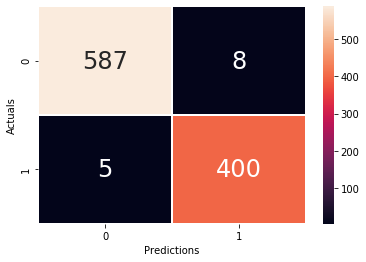

In [41]:
#df_new = pd.DataFrame(new_data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(new_data['y_Actual'], new_data['y_Predicted'], rownames=['Actuals'], colnames=['Predictions'])

sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt=".0f", annot_kws={'size':24})
plt.show()

In [42]:
confusion_matrix

Predictions,0,1
Actuals,,
0,587,8
1,5,400


In [43]:
confusion_matrix = confusion_matrix.rename(columns={0 : "Not on LEIE List", 1 : "On LEIE List"})
confusion_matrix = confusion_matrix.rename(index={0 : "Not on LEIE List", 1 : "On LEIE List"})

In [44]:
confusion_matrix

Predictions,Not on LEIE List,On LEIE List
Actuals,,
Not on LEIE List,587,8
On LEIE List,5,400


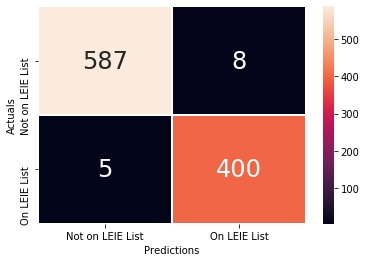

In [45]:
sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt=".0f", annot_kws={'size':24})
plt.show()